In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t0 = 22.5
alpha = 41
delta_t = np.array([-850, -770, -700, -620, -540, -460, -380, -300, -280, -260, -230, -200, -180, -160, -120, -100, -80, -30, -10, 50, 100, 150, 200, 250, 300, 330, 360, 410, 460, 500, 560, 600, 660, 720, 780 ])

In [3]:
t = np.array(list(map(lambda x: t0 + x/41, delta_t)))
print(t)

[ 1.76829268  3.7195122   5.42682927  7.37804878  9.32926829 11.2804878
 13.23170732 15.18292683 15.67073171 16.15853659 16.8902439  17.62195122
 18.1097561  18.59756098 19.57317073 20.06097561 20.54878049 21.76829268
 22.25609756 23.7195122  24.93902439 26.15853659 27.37804878 28.59756098
 29.81707317 30.54878049 31.2804878  32.5        33.7195122  34.69512195
 36.15853659 37.13414634 38.59756098 40.06097561 41.52439024]


In [4]:
fr_down = np.array([807.842, 807.942, 808.106, 808.533, 809.463, 812.449, 821.603, 838.124, 843.669, 847.262, 850.995, 854.226, 856.007, 857.285, 859.313, 860.186, 860.776, 861.862, 862.465, 863.083, 863.810, 864.510, 865.043, 865.557, 865.824, 866.066, 866.188, 866.451, 866.670, 866.847, 867.122, 867.227, 867.342, 867.567, 867.688])

In [5]:
fr_up = np.array([867.360, 867.214, 867.377, 867.325, 867.732, 867.487, 867.700, 867.990, 868.189, 868.348, 868.468, 868.470, 868.509, 868.558, 868.633, 868.636, 868.674, 868.660, 868.962, 868.774, 868.812, 868.863, 868.915, 869.049, 869.093, 869.097, 869.101, 869.146, 869.240, 869.300, 869.288, 869.345, 869.441, 869.464, 869.468])

In [6]:
delta_t = 1/41
kappa = np.array(list(map(lambda x: (x[1]*x[1]-x[0]*x[0])/(x[0]*x[0])/(4*np.pi), list(zip(fr_down, fr_up)))))
delta_f = 0.1
delta_kappa = []
for i in range(len(kappa)):
    my_kappa = kappa[i]
    my_f_down = fr_down[i]
    my_f_up = fr_up[i]
    delta_kappa.append(my_kappa*delta_f/(2*np.pi)*np.sqrt(1/((my_f_up-my_f_down)*(my_f_up-my_f_down))+1/(my_f_down*my_f_down)))
print(kappa)
print(delta_kappa)

[0.01215774 0.01210416 0.0121014  0.01199361 0.01186909 0.01114688
 0.00918008 0.00577243 0.00469282 0.00401021 0.00330139 0.00267599
 0.00234144 0.00210659 0.00173554 0.00157113 0.00146702 0.0012603
 0.00120344 0.0010529  0.00092427 0.0008034  0.00071398 0.00064339
 0.00060204 0.00055797 0.00053614 0.0004958  0.00047265 0.00045101
 0.00039805 0.00038917 0.00038563 0.00034838 0.00032683]
[3.2598685786883863e-06, 3.2588974495273185e-06, 3.258206902235743e-06, 3.2553455917941106e-06, 3.2502901497713046e-06, 3.230762483237442e-06, 3.1745068820669453e-06, 3.0780616951284147e-06, 3.047313710604527e-06, 3.0278045213845435e-06, 3.0077422166201343e-06, 2.9904304754606524e-06, 2.9810494309542e-06, 2.974395035973015e-06, 2.963897715498967e-06, 2.9593529316084433e-06, 2.9563527989973337e-06, 2.9507025765443347e-06, 2.9481108945950132e-06, 2.9446020695264453e-06, 2.9409315638360553e-06, 2.9374315690153975e-06, 2.9347951972238552e-06, 2.932400603849915e-06, 2.9311147822140836e-06, 2.929889401699825

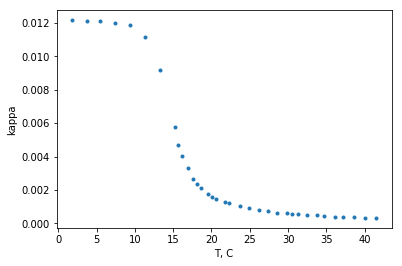

In [7]:
x = t
y = kappa
plt.ylabel('kappa')
plt.xlabel('T, C')
plt.plot(x, y, 'o', markersize=3)
plt.savefig('lab_9_1_kappa.png', dpi=1000)

[  110.05840229 -1575.90290709]
[1.2329181661804605, 34.02363210639859]
14.318787792254005
0.34827895465535297


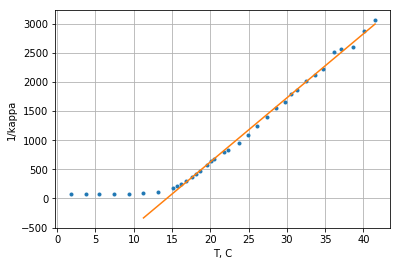

In [8]:
kappa_inv = np.array(list(map(lambda x: 1/x, list(kappa))))
x = t
y = kappa_inv
x_err = delta_t
y_err = kappa_inv* (delta_kappa/kappa)
plt.ylabel('1/kappa')
plt.xlabel('T, C')
plt.plot(x, y, 'o', markersize=3)
x_corr = x[7:]
y_corr = y[7:]
fit = np.polyfit(x_corr, y_corr, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print(params)
print(cov)
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=1)
plt.plot(x[5:], params[0]*x[5:] + params[1])
plt.savefig('lab_9_1_kappa_inv.png', dpi=1000)
t_kuri = -params[1]/params[0]
delta_t_kuri = t_kuri * np.sqrt((cov[0]/params[0]) * (cov[0]/params[0]) + (cov[1]/params[1]) * (cov[1]/params[1]))
print(t_kuri)
print(delta_t_kuri)

In [10]:
s = 7/2
k_b = 8.61733e-5
n = 12
j = 3 * k_b * (t_kuri + 273.15) / (2 * n * s * (s + 1))
delta_j = 3 * k_b * delta_t_kuri / (2 * n * s * (s + 1))

In [14]:
print('%E'% j)
print(delta_j)

1.966042E-04
2.381932289143026e-07
